In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

2026-01-09 03:54:35.383163: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1767930875.625032      17 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1767930875.693101      17 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1767930876.250519      17 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1767930876.250581      17 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1767930876.250584      17 computation_placer.cc:177] computation placer alr

In [3]:
(X_train,y_train), (X_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
X_train.shape

# it means that there are data of 60k images and each image is of 28 by 28 numpy arrays.

(60000, 28, 28)

In [5]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

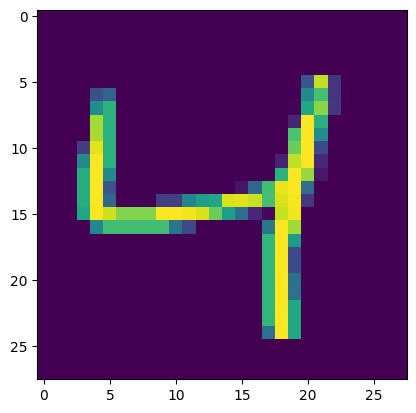

In [6]:
# we can also check the images

import matplotlib.pyplot as plt
plt.imshow(X_train[2])

In [7]:
# for making a NN, we should take care that our numbers must be in similar ranges

# so we divide each values by 255, because of this all values comes in range of (0 to 1).

In [8]:
X_train = X_train/255
X_test = X_test/255

In [9]:
X_train[0]   # so we can see that each values comes in range of (0-1).

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [10]:
# Now, it's time to make our ANN model

model = Sequential()

# Add layers to the model
# first we have to change the shape of an array from (28,28) to (1,784) using 'Flatten' layer

model.add(Flatten(input_shape=(28,28)))   # it changes the shape of an array
model.add(Dense(128, activation='relu'))

# add another hidden layer
model.add(Dense(32, activation='relu'))

# Add for output layer 
# we have to take 10 nodes as it multiclass classification i.e.,(0-9)
model.add(Dense(10, activation='softmax'))  
# take 'softmax' in activation whenever we have more than 1 node in o/p for classification.

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2026-01-09 03:54:52.976330: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 104,938 (409.91 KB)

 Trainable params: 104,938 (409.91 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [13]:
history = model.fit(X_train,y_train, epochs=25, validation_split=0.2)

Epoch 1/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8506 - loss: 0.5224 - val_accuracy: 0.9544 - val_loss: 0.1551
Epoch 2/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9615 - loss: 0.1249 - val_accuracy: 0.9656 - val_loss: 0.1204
Epoch 3/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9756 - loss: 0.0804 - val_accuracy: 0.9686 - val_loss: 0.1066
Epoch 4/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9800 - loss: 0.0648 - val_accuracy: 0.9698 - val_loss: 0.1034
Epoch 5/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9847 - loss: 0.0491 - val_accuracy: 0.9730 - val_loss: 0.1038
Epoch 6/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9896 - loss: 0.0354 - val_accuracy: 0.9705 - val_loss: 0.1108
Epoch 7/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9901 - loss: 0.0329 - val_accuracy: 0.9706 - val_loss: 0.1173
Epoch 8/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9934 - loss: 0.0218 - 

In [14]:
# make prediction 
 
y_prob = model.predict(X_test)   # it gives the probability for each images 

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [15]:
# but we have to show in our o/p that whether the digit is (1/2/3/...)

# so we have to check for every array, and we have to find that on which index, value is maximum

In [16]:
y_pred = y_prob.argmax(axis=1)

# so, it tells that a/c to our model, 1st test image is 7, 2nd test image is 2, ... 

In [17]:
# check for accuracy

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9751

In [18]:
# 0.9773 is a perfect accuracy, but we can also improve it by changing architecture

# let's add another hidden layer having 32 nodes
# change no. of epochs from 10 to 25  and store everything on 'history' variable for future.

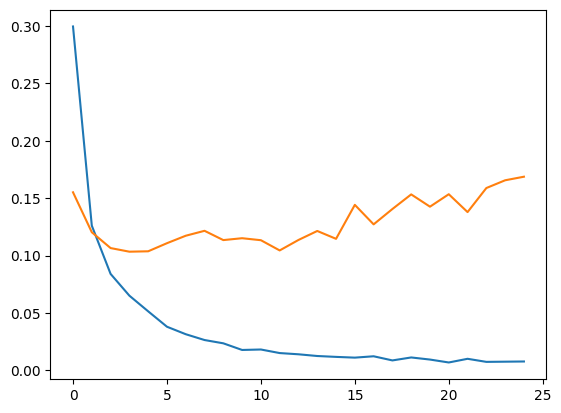

In [19]:
# after doing this we get slightly low accuracy than before
# let's visualize it through the graph

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

# so we can see that there are certain chances of overfitting after a time that's why accuracy decreases

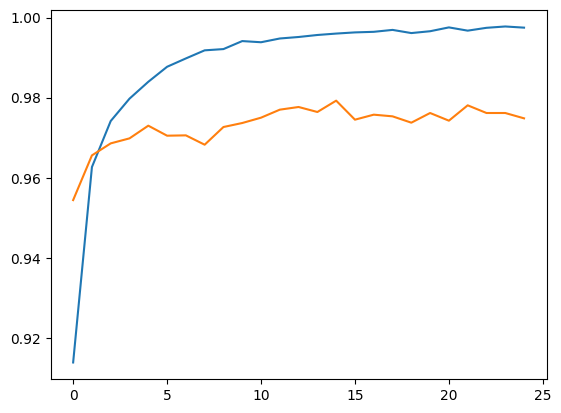

In [20]:
# check same for accuracy 

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [21]:
# let's also check for our prediction that how it works

X_test

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

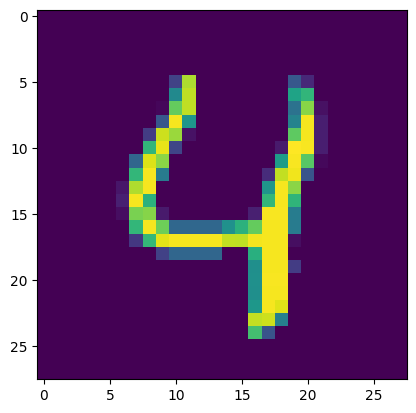

In [22]:
# check for which image is present at index

plt.imshow(X_test[4])

In [23]:
# let's predict it

model.predict(X_test[4].reshape(1,28,28))   # like we check for 1 image of 28 by 28.

# so these are our predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


array([[8.1089665e-13, 1.4187257e-16, 5.4486801e-18, 1.6125863e-20,
        9.9998999e-01, 1.6768557e-21, 6.9760803e-15, 1.9970794e-12,
        4.3613997e-19, 9.9586468e-06]], dtype=float32)

In [24]:
model.predict(X_test[4].reshape(1,28,28)).argmax(axis=1)

# so it becomes same as in image

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


array([4])

In [25]:
# so we can also check for different images and check prediction for that